In [2]:
import matplotlib.pyplot as plt
import cv2
from functions import *

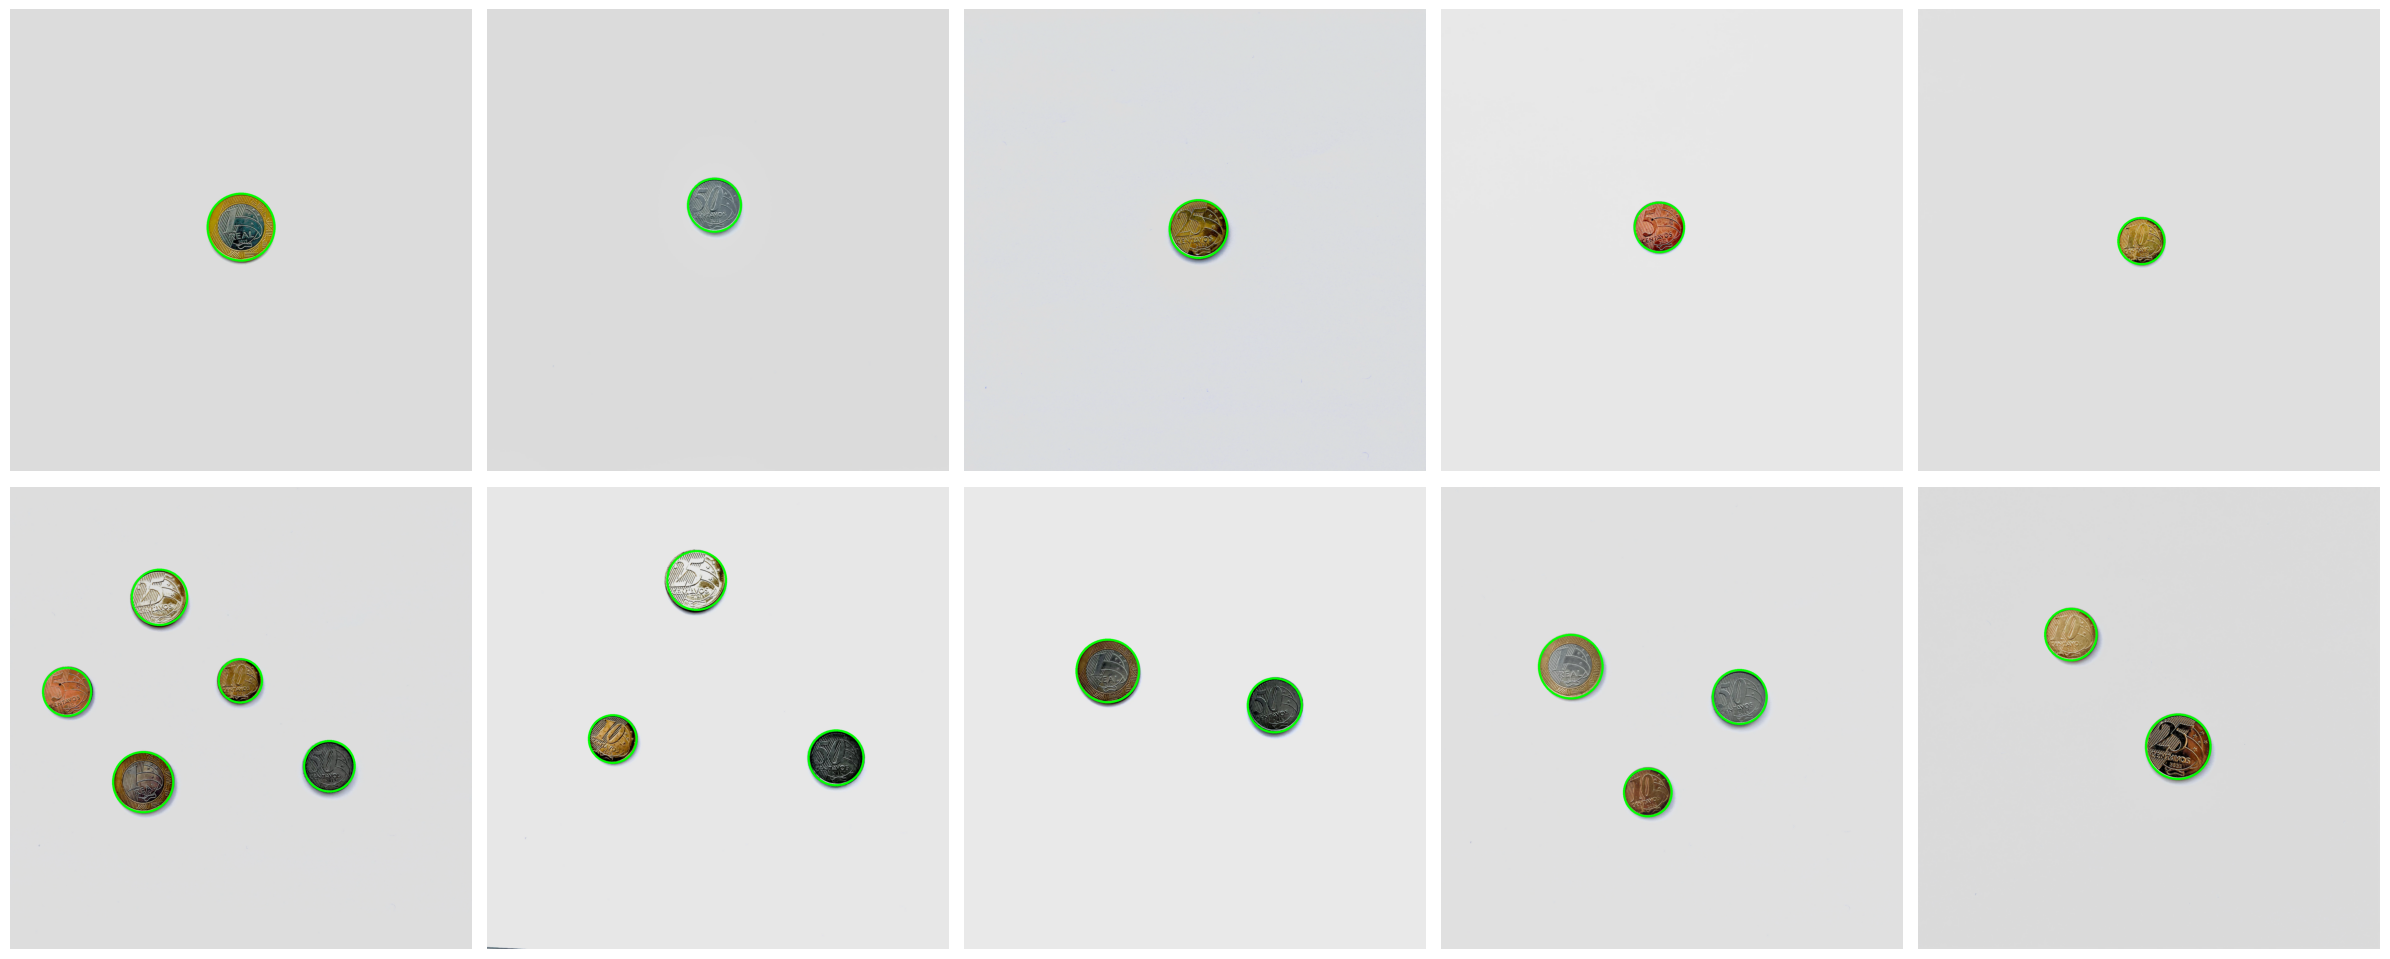

In [3]:
def main():
    fig, axs = plt.subplots(2, 5, figsize=(24,10))
    axs = axs.flatten()

    for i in range(10):
        img_gray, img_rgb = prepare_img(f'images/img{i}.png')
        circles = find_circles(img_gray)
        circles = treat_circles(circles)

        if circles is not None:
            filtered_circles = filter_inner_circles(circles, 10)
            img_rgb = draw_circles(img_rgb, filtered_circles)

        axs[i].imshow(img_rgb, cmap='gray')
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

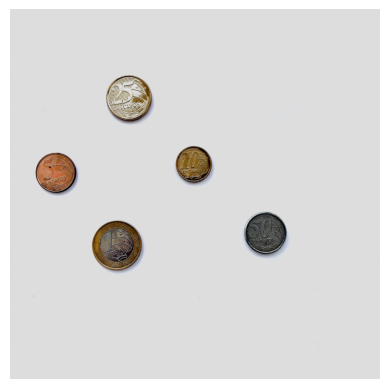

In [7]:
img = cv2.imread('images/img5.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (1920, 1920))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()